In [ ]:
# Importing Libaries

# import pyforest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('synthetic_indian_upi_fraud_data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionID         10000 non-null  int64  
 1   UserID                10000 non-null  object 
 2   Amount                10000 non-null  float64
 3   Timestamp             10000 non-null  object 
 4   MerchantCategory      10000 non-null  object 
 5   TransactionType       10000 non-null  object 
 6   DeviceID              10000 non-null  object 
 7   IPAddress             10000 non-null  object 
 8   Latitude              10000 non-null  float64
 9   Longitude             10000 non-null  float64
 10  AvgTransactionAmount  10000 non-null  float64
 11  TransactionFrequency  10000 non-null  object 
 12  UnusualLocation       10000 non-null  bool   
 13  UnusualAmount         10000 non-null  bool   
 14  NewDevice             10000 non-null  bool   
 15  FailedAttempts      

In [ ]:
df.shape

(10000, 19)

In [ ]:
df.head()

,TransactionID,UserID,Amount,Timestamp,MerchantCategory,TransactionType,DeviceID,IPAddress,Latitude,Longitude,AvgTransactionAmount,TransactionFrequency,UnusualLocation,UnusualAmount,NewDevice,FailedAttempts,FraudFlag,PhoneNumber,BankName
0,842835309389,b0b99baa-1fd2-41e5-ac94-37aa0ec862f9,8589.00,2024-01-22 03:59:58,Electronics,P2M,42296fa1-8d7a-478c-a8c9-590b9d14cdb9,75.122.84.213,23.354478,-40.536076,670.31,5/day,False,True,False,2,True,2798604680,Bank of Baroda
1,592863054785,0cc467c5-8b71-4ba4-9c75-4a9e2bec2c8c,9090.54,2024-07-01 13:43:33,Electronics,P2M,e566b8a8-17c3-4372-9e07-e4c4eb3113b7,16.110.81.53,-62.956912,-102.511919,7265.96,3/day,False,True,False,2,False,3614149152,ICICI Bank
2,373481869464,f7de03ee-b7f5-4568-8ba2-e889bced4d88,8814.41,2024-04-02 05:23:39,Electronics,P2P,897d0824-bc4f-4ee7-9bfb-c8eea31b2ca2,6.47.215.37,-13.112830,-18.978059,8750.89,3/day,True,False,True,3,False,912661191911,ICICI Bank
3,285572156436,456b3f39-e9cc-429f-8568-125612c12987,3971.25,2024-06-14 16:13:43,Restaurants,P2P,a4d2f5ef-19c7-4baa-b3ea-b04069d65021,214.166.195.254,-23.898771,81.760634,8348.14,1/day,True,True,False,4,False,916358088125,State Bank of India
4,874207772966,7b4b734d-f0c5-4dce-8b9c-0b2e226abc86,4376.74,2024-07-16 03:22:40,Groceries,P2M,8aee664a-fb51-4e74-98a1-cf632a02cd27,151.99.121.13,11.383999,12.669192,1719.74,1/day,True,True,False,0,False,5132838721,ICICI Bank


### DATA PREPARATION

In [ ]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
# Check missing values
df.isnull().sum()

,0
TransactionID,0
UserID,0
Amount,0
Timestamp,0
MerchantCategory,0
TransactionType,0
DeviceID,0
IPAddress,0
Latitude,0
Longitude,0


In [ ]:
# Check unique values
df.nunique()

,0
TransactionID,10000
UserID,10000
Amount,9957
Timestamp,9997
MerchantCategory,7
TransactionType,2
DeviceID,10000
IPAddress,10000
Latitude,10000
Longitude,9999


In [ ]:
# Find unique columns with unique values
unique_columns = df.columns[df.nunique() == len(df)]
print("Unique columns with unique values:")
print(unique_columns)

Unique columns with unique values:
Index(['TransactionID', 'UserID', 'DeviceID', 'IPAddress', 'Latitude',
       'PhoneNumber'],
      dtype='object')


In [ ]:
# Droping ID columns as they do not add any value to the analysis
df.drop(columns=['TransactionID', 'UserID','DeviceID','IPAddress','Latitude','Longitude','PhoneNumber'], axis=1, inplace=True)

In [ ]:
df.head()

,Amount,Timestamp,MerchantCategory,TransactionType,AvgTransactionAmount,TransactionFrequency,UnusualLocation,UnusualAmount,NewDevice,FailedAttempts,FraudFlag,BankName
0,8589.00,2024-01-22 03:59:58,Electronics,P2M,670.31,5/day,False,True,False,2,True,Bank of Baroda
1,9090.54,2024-07-01 13:43:33,Electronics,P2M,7265.96,3/day,False,True,False,2,False,ICICI Bank
2,8814.41,2024-04-02 05:23:39,Electronics,P2P,8750.89,3/day,True,False,True,3,False,ICICI Bank
3,3971.25,2024-06-14 16:13:43,Restaurants,P2P,8348.14,1/day,True,True,False,4,False,State Bank of India
4,4376.74,2024-07-16 03:22:40,Groceries,P2M,1719.74,1/day,True,True,False,0,False,ICICI Bank


In [ ]:
# Preview timestamp
print(df['Timestamp'].head())

# Converting Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extracting Year and Month
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month

# Mapping numeric month to string (Jan, Feb, etc.)
months = {
    1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
    7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
}
df['Month'] = df['Month'].map(months)

# Optional: Extract day of week and hour for more time-based analysis
df['DayOfWeek'] = df['Timestamp'].dt.day_name()
df['Hour'] = df['Timestamp'].dt.hour

# Drop original Timestamp if not needed
# df.drop('Timestamp', axis=1, inplace=True)

# Check updated columns
print("\nColumns in the dataset:\n", df.columns)

# Check first 5 rows
print("\nFirst 5 rows:\n", df.head())

# Unique month values
print("\nUnique month names:\n", df['Month'].unique())

# Descriptive statistics for numerical features
numerical_stats = df.describe(include='number').T
print("\nDescriptive statistics for numerical variables:")
print(numerical_stats)

0    2024-01-22 03:59:58
1    2024-07-01 13:43:33
2    2024-04-02 05:23:39
3    2024-06-14 16:13:43
4    2024-07-16 03:22:40
Name: Timestamp, dtype: object

Columns in the dataset:
 Index(['Amount', 'Timestamp', 'MerchantCategory', 'TransactionType',
       'AvgTransactionAmount', 'TransactionFrequency', 'UnusualLocation',
       'UnusualAmount', 'NewDevice', 'FailedAttempts', 'FraudFlag', 'BankName',
       'Year', 'Month', 'DayOfWeek', 'Hour'],
      dtype='object')

First 5 rows:
     Amount           Timestamp MerchantCategory TransactionType  \
0  8589.00 2024-01-22 03:59:58      Electronics             P2M   
1  9090.54 2024-07-01 13:43:33      Electronics             P2M   
2  8814.41 2024-04-02 05:23:39      Electronics             P2P   
3  3971.25 2024-06-14 16:13:43      Restaurants             P2P   
4  4376.74 2024-07-16 03:22:40        Groceries             P2M   

   AvgTransactionAmount TransactionFrequency  UnusualLocation  UnusualAmount  \
0                670.31     

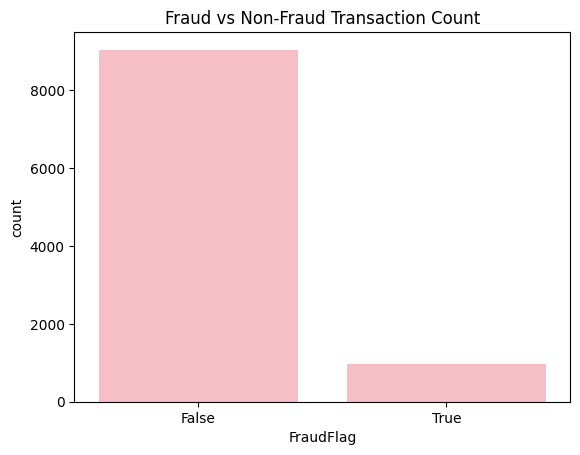

,proportion
FraudFlag,
False,90.35
True,9.65


In [ ]:
# Percentage distribution
df['FraudFlag'].value_counts(normalize=True) * 100

# Count plot
sns.countplot(x='FraudFlag', data=df, color='lightpink')
plt.title("Fraud vs Non-Fraud Transaction Count")
plt.show()
# Distribution of target variable
df['FraudFlag'].value_counts(normalize=True)*100

In [ ]:
# Create fraud and non-fraud subsets
fraud = df[df['FraudFlag'] == True]
normal = df[df['FraudFlag'] == False]

print(f"Fraud cases: {fraud.shape[0]}")


Fraud cases: 965


In [ ]:
fraud.shape

(965, 16)

In [ ]:
fraud.head()

,Amount,Timestamp,MerchantCategory,TransactionType,AvgTransactionAmount,TransactionFrequency,UnusualLocation,UnusualAmount,NewDevice,FailedAttempts,FraudFlag,BankName,Year,Month,DayOfWeek,Hour
0,8589.00,2024-01-22 03:59:58,Electronics,P2M,670.31,5/day,False,True,False,2,True,Bank of Baroda,2024,Jan,Monday,3
8,9026.54,2024-05-09 19:49:56,Groceries,P2P,103.52,1/day,True,True,False,0,True,Axis Bank,2024,May,Thursday,19
12,1077.17,2024-04-30 09:43:02,Utilities,P2M,8450.88,3/day,False,True,True,4,True,Axis Bank,2024,Apr,Tuesday,9
27,7345.78,2024-07-03 22:04:30,Utilities,P2M,7403.02,1/day,True,False,True,1,True,Axis Bank,2024,Jul,Wednesday,22
31,4114.46,2024-06-22 21:52:59,Clothing,P2M,2769.60,3/day,False,False,False,2,True,ICICI Bank,2024,Jun,Saturday,21


In [ ]:
fraud.dtypes

,0
Amount,float64
Timestamp,datetime64[ns]
MerchantCategory,object
TransactionType,object
AvgTransactionAmount,float64
TransactionFrequency,object
UnusualLocation,bool
UnusualAmount,bool
NewDevice,bool
FailedAttempts,int64


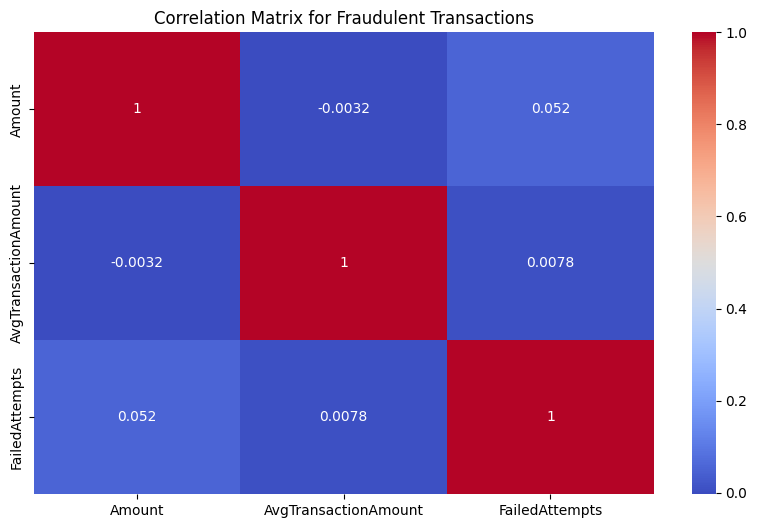

In [ ]:
# Numeric correlation
numeric_columns = fraud.select_dtypes(include=['int64', 'float64'])
corr = numeric_columns.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Fraudulent Transactions")
plt.show()


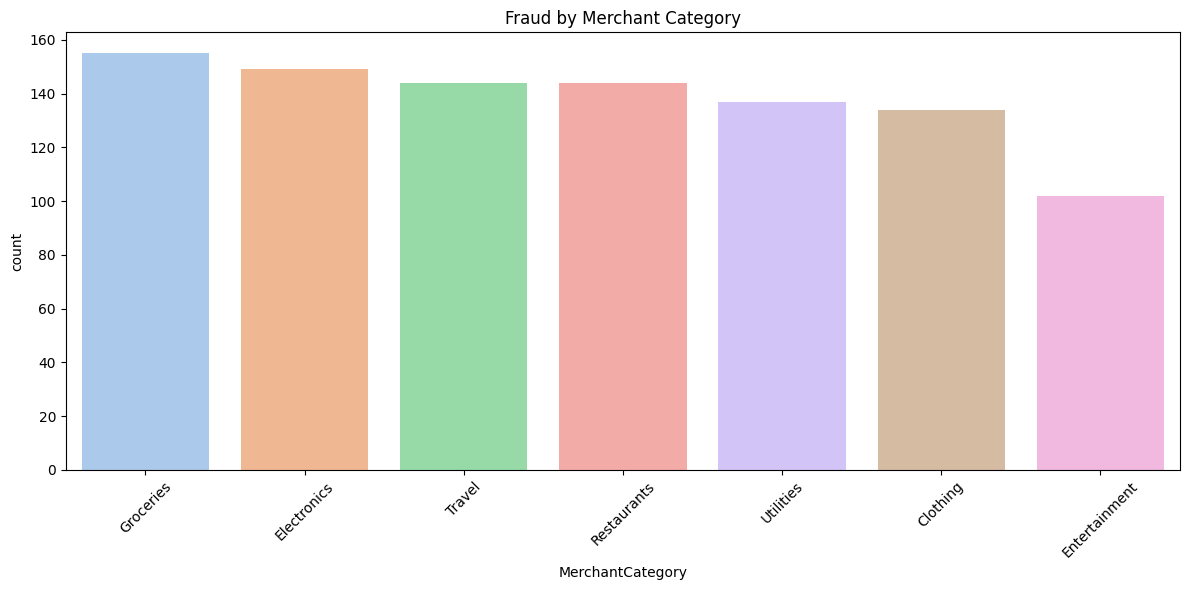

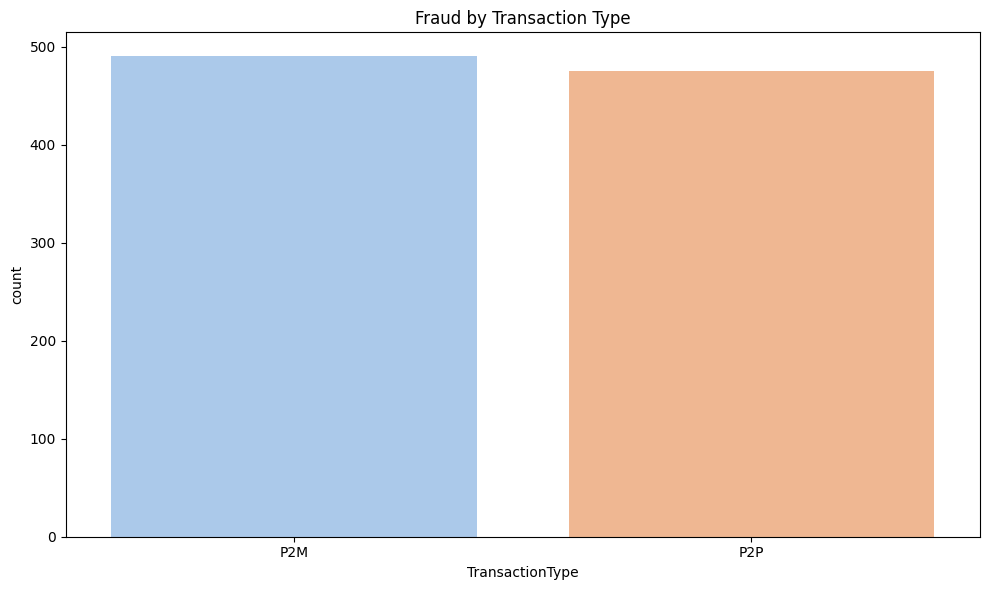

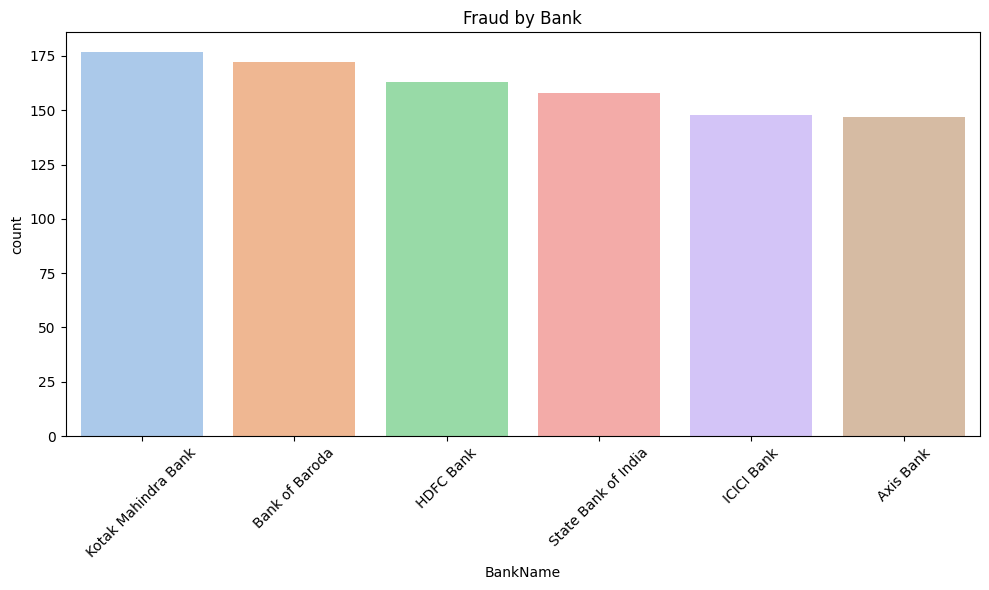

In [ ]:
# Fraud distribution by Merchant Category
plt.figure(figsize=(12, 6))
sns.countplot(data=fraud, x='MerchantCategory', palette='pastel', order=fraud['MerchantCategory'].value_counts().index)
plt.title('Fraud by Merchant Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Transaction Type
plt.figure(figsize=(10, 6))
sns.countplot(data=fraud, x='TransactionType', palette='pastel')
plt.title('Fraud by Transaction Type')
plt.tight_layout()
plt.show()

# Bank-wise fraud
plt.figure(figsize=(10, 6))
sns.countplot(data=fraud, x='BankName', palette='pastel', order=fraud['BankName'].value_counts().index)
plt.title('Fraud by Bank')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

def chi_square_analysis(df, target_variable):
    """
    Performs chi-square test of independence for categorical variables against the target variable.

    Args:
        df (pd.DataFrame): The input dataframe.
        target_variable (str): The name of the target variable column.

    Returns:
        None. Prints the results of the chi-square test.
    """

    categorical_cols = df.select_dtypes(include=['object', 'category']).columns

    for col in categorical_cols:
        if col != target_variable:  # Skip the target variable itself
            contingency_table = pd.crosstab(df[col], df[target_variable])
            chi2, p, dof, expected = chi2_contingency(contingency_table)

            print(f"Chi-square test for {col} vs {target_variable}:")
            print(f"Chi-square statistic: {chi2}")
            print(f"P-value: {p}")
            print("-" * 30)

# Assuming your DataFrame is named 'df' and the target variable is 'FraudFlag'
chi_square_analysis(df, 'FraudFlag')

Chi-square test for MerchantCategory vs FraudFlag:
Chi-square statistic: 11.285537914198693
P-value: 0.07994238009162556
------------------------------
Chi-square test for TransactionType vs FraudFlag:
Chi-square statistic: 0.08098934129401023
P-value: 0.7759611365156746
------------------------------
Chi-square test for TransactionFrequency vs FraudFlag:
Chi-square statistic: 1.196782693097335
P-value: 0.5496951943055068
------------------------------
Chi-square test for BankName vs FraudFlag:
Chi-square statistic: 5.105502347408172
P-value: 0.4031408067497003
------------------------------
Chi-square test for Month vs FraudFlag:
Chi-square statistic: 5.658523833983237
P-value: 0.46250768967044387
------------------------------
Chi-square test for DayOfWeek vs FraudFlag:
Chi-square statistic: 10.661851319239414
P-value: 0.09940663969165565
------------------------------


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

def anova_analysis(df, target_variable):
    df[target_variable] = df[target_variable].astype(int)  # Ensure numeric
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

    for col in numerical_cols:
        if col != target_variable and df[col].nunique() > 1:
            model = ols(f"{target_variable} ~ {col}", data=df).fit()
            anova_table = sm.stats.anova_lm(model, typ=2)
            print(f"\nANOVA: {col} vs {target_variable}")
            print(anova_table[['F', 'PR(>F)']])


In [ ]:
anova_analysis(df, 'FraudFlag')



ANOVA: Amount vs FraudFlag
                 F    PR(>F)
Amount    0.086764  0.768338
Residual       NaN       NaN

ANOVA: AvgTransactionAmount vs FraudFlag
                            F    PR(>F)
AvgTransactionAmount  0.83911  0.359674
Residual                  NaN       NaN

ANOVA: FailedAttempts vs FraudFlag
                       F    PR(>F)
FailedAttempts  4.645524  0.031158
Residual             NaN       NaN


In [ ]:
df.head()

,Amount,Timestamp,MerchantCategory,TransactionType,AvgTransactionAmount,TransactionFrequency,UnusualLocation,UnusualAmount,NewDevice,FailedAttempts,FraudFlag,BankName,Year,Month,DayOfWeek,Hour
0,8589.00,2024-01-22 03:59:58,Electronics,P2M,670.31,5/day,False,True,False,2,1,Bank of Baroda,2024,Jan,Monday,3
1,9090.54,2024-07-01 13:43:33,Electronics,P2M,7265.96,3/day,False,True,False,2,0,ICICI Bank,2024,Jul,Monday,13
2,8814.41,2024-04-02 05:23:39,Electronics,P2P,8750.89,3/day,True,False,True,3,0,ICICI Bank,2024,Apr,Tuesday,5
3,3971.25,2024-06-14 16:13:43,Restaurants,P2P,8348.14,1/day,True,True,False,4,0,State Bank of India,2024,Jun,Friday,16
4,4376.74,2024-07-16 03:22:40,Groceries,P2M,1719.74,1/day,True,True,False,0,0,ICICI Bank,2024,Jul,Tuesday,3


In [ ]:
df.dtypes

,0
Amount,float64
Timestamp,datetime64[ns]
MerchantCategory,object
TransactionType,object
AvgTransactionAmount,float64
TransactionFrequency,object
UnusualLocation,bool
UnusualAmount,bool
NewDevice,bool
FailedAttempts,int64


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 1: Copy data
data = df.copy()

# Step 2: Convert booleans to int (for modeling)
bool_cols = ['UnusualLocation', 'UnusualAmount', 'NewDevice']
data[bool_cols] = data[bool_cols].astype(int)

# Step 3: Convert 'FraudFlag' to int if not already
data['FraudFlag'] = data['FraudFlag'].astype(int)

# Step 4: Encode ordinal columns using Label Encoding
label_cols = ['Year', 'Month', 'DayOfWeek']
le = LabelEncoder()
for col in label_cols:
    data[col] = le.fit_transform(data[col])

# Step 5: One-hot encode non-ordinal categoricals
non_ordinal = ['TransactionType', 'MerchantCategory', 'BankName']
data = pd.get_dummies(data, columns=non_ordinal, drop_first=True)

# Step 6: Drop unused or non-numeric columns
data.drop(columns=['Timestamp', 'TransactionFrequency'], inplace=True)

# Step 7: Feature scaling (optional, if using models like KNN/SVM)
scaler = StandardScaler()
numeric_cols = ['Amount', 'AvgTransactionAmount', 'FailedAttempts', 'Hour']

data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# ✅ Final check
print(data.head())
print(data.dtypes)
print(f"Final shape: {data.shape}")


     Amount  AvgTransactionAmount  UnusualLocation  UnusualAmount  NewDevice  \
0  1.244180             -1.495818                0              1          0   
1  1.418263              0.788894                0              1          0   
2  1.322419              1.303269                1              0          1   
3 -0.358623              1.163757                1              1          0   
4 -0.217879             -1.132299                1              1          0   

   FailedAttempts  FraudFlag  Year  Month  DayOfWeek  ...  \
0       -0.008893          1     0      2          1  ...   
1       -0.008893          0     0      3          1  ...   
2        0.696902          0     0      0          5  ...   
3        1.402697          0     0      4          0  ...   
4       -1.420483          0     0      3          5  ...   

   MerchantCategory_Entertainment  MerchantCategory_Groceries  \
0                           False                       False   
1                     

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

def chi_square_analysis(df, target_variable, alpha=0.05):
    # Selecting only object (categorical) columns
    categorical_vars = df.select_dtypes(include=['object']).columns
    results = []

    for cat_var in categorical_vars:
        # Create a contingency table
        contingency_table = pd.crosstab(df[cat_var], df[target_variable])

        # Perform Chi-Square test
        chi2, p, _, _ = chi2_contingency(contingency_table)

        # Interpret results
        if p >= alpha:
            comment = "No significant association with " + target_variable
            recommendation = "Can be removed"
        else:
            comment = "Significant association with " + target_variable
            recommendation = ""

        # Append results
        results.append([cat_var, chi2, p, comment, recommendation])

    # Convert to DataFrame
    results_df = pd.DataFrame(results, columns=['Column', 'Chi-square statistic', 'p-value', 'Comment', 'Recommendation'])
    return results_df

# Run on your dataset
chi_square_results = chi_square_analysis(df, 'FraudFlag')
print(chi_square_results)


                 Column  Chi-square statistic   p-value  \
0      MerchantCategory             11.285538  0.079942   
1       TransactionType              0.080989  0.775961   
2  TransactionFrequency              1.196783  0.549695   
3              BankName              5.105502  0.403141   
4                 Month              5.658524  0.462508   
5             DayOfWeek             10.661851  0.099407   

                                     Comment  Recommendation  
0  No significant association with FraudFlag  Can be removed  
1  No significant association with FraudFlag  Can be removed  
2  No significant association with FraudFlag  Can be removed  
3  No significant association with FraudFlag  Can be removed  
4  No significant association with FraudFlag  Can be removed  
5  No significant association with FraudFlag  Can be removed  


In [ ]:
# Updated columns to drop based on chi-square test results
columns_to_drop = [
    'MerchantCategory',
    'TransactionType',
    'TransactionFrequency',
    'BankName',
    'Month',
    'DayOfWeek'
]

# Drop those columns from the DataFrame
df.drop(columns=columns_to_drop, inplace=True)

# Check the remaining columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Amount                10000 non-null  float64       
 1   Timestamp             10000 non-null  datetime64[ns]
 2   AvgTransactionAmount  10000 non-null  float64       
 3   UnusualLocation       10000 non-null  bool          
 4   UnusualAmount         10000 non-null  bool          
 5   NewDevice             10000 non-null  bool          
 6   FailedAttempts        10000 non-null  int64         
 7   FraudFlag             10000 non-null  int64         
 8   Year                  10000 non-null  int32         
 9   Hour                  10000 non-null  int32         
dtypes: bool(3), datetime64[ns](1), float64(2), int32(2), int64(2)
memory usage: 498.2 KB


In [ ]:
from scipy.stats import f_oneway
import pandas as pd

def anova_analysis(df, target_variable, alpha=0.05):
    numerical_vars = df.select_dtypes(include=['int64', 'float64', 'int32']).columns
    results = []

    for num_var in numerical_vars:
        if num_var != target_variable:
            groups = df.groupby(target_variable)[num_var].apply(list)
            f_statistic, p_value = f_oneway(*groups)

            if p_value < alpha:
                comment = f"Significant difference in {num_var} between fraud and non-fraud transactions"
                recommendation = ""
            else:
                comment = f"No significant difference in {num_var} between fraud and non-fraud transactions"
                recommendation = "Can be removed"

            results.append([num_var, f_statistic, p_value, comment, recommendation])

    results_df = pd.DataFrame(results, columns=['Column', 'F-statistic', 'p-value', 'Comment', 'Recommendation'])
    return results_df

# ✅ Use correct column name
anova_results = anova_analysis(df, 'FraudFlag')
print(anova_results)

# Drop non-significant columns
columns_to_drop_anova = anova_results[anova_results['Recommendation'] == "Can be removed"]['Column'].tolist()
df.drop(columns=columns_to_drop_anova, inplace=True)

# Check the updated DataFrame
df.info()


                 Column  F-statistic   p-value  \
0                Amount     0.086764  0.768338   
1  AvgTransactionAmount     0.839110  0.359674   
2        FailedAttempts     4.645524  0.031158   
3                  Year          NaN       NaN   
4                  Hour     0.092098  0.761533   

                                             Comment  Recommendation  
0  No significant difference in Amount between fr...  Can be removed  
1  No significant difference in AvgTransactionAmo...  Can be removed  
2  Significant difference in FailedAttempts betwe...                  
3  No significant difference in Year between frau...  Can be removed  
4  No significant difference in Hour between frau...  Can be removed  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Timestamp        10000 non-null  datetime64[ns]
 1   Un

In [ ]:
# Extract features from Timestamp
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)

# Drop original Timestamp
df.drop(columns='Timestamp', inplace=True)

# Convert bool columns to int
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

# Check final dataset
print(df.head())
print(df.info())


   UnusualLocation  UnusualAmount  NewDevice  FailedAttempts  FraudFlag  Hour  \
0                0              1          0               2          1     3   
1                0              1          0               2          0    13   
2                1              0          1               3          0     5   
3                1              1          0               4          0    16   
4                1              1          0               0          0     3   

   DayOfWeek  IsWeekend  
0          0          0  
1          0          0  
2          1          0  
3          4          0  
4          1          0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   UnusualLocation  10000 non-null  int64
 1   UnusualAmount    10000 non-null  int64
 2   NewDevice        10000 non-null  int64
 3   FailedAttempts   10000 no

In [ ]:
df.head()

,UnusualLocation,UnusualAmount,NewDevice,FailedAttempts,FraudFlag,Hour,DayOfWeek,IsWeekend
0,0,1,0,2,1,3,0,0
1,0,1,0,2,0,13,0,0
2,1,0,1,3,0,5,1,0
3,1,1,0,4,0,16,4,0
4,1,1,0,0,0,3,1,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Perform scaling
def preprocess_data(X):

    # Initialize StandardScaler
    scaler = StandardScaler()

    # Scale the features
    X_scaled = scaler.fit_transform(X)
    return X_scaled

# Splitting the dataset into features (X) and target variable (y)
X = data.drop('FraudFlag', axis=1)
y = data['FraudFlag']

# Preprocess the features
X_scaled = preprocess_data(X)

# Split the preprocessed data into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)


Training features shape: (8000, 22)
Test features shape: (2000, 22)
Training target shape: (8000,)
Test target shape: (2000,)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier  # Import XGBoost classifier

# Assuming you have already loaded your data into X and y

# Split the sampled data into training and testing sets with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define a function to evaluate a model and return a dictionary of metrics
def evaluate_model(model, X_test, y_test):
    # Calculate predictions
    y_pred = model.predict(X_test)

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Return metrics as a dictionary
    return {
        'Model': type(model).__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC Score': roc_auc
    }

# Define models without Support Vector Machine (SVM)
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),  # Added XGBoost to the dictionary
}

# List to store evaluation results
results = []

# Model Training and Evaluation
for model_name, model in models.items():
    print(model_name + ":")
    model.fit(X_train, y_train)  # Assuming X_train, y_train are defined
    metrics = evaluate_model(model, X_test, y_test)  # Assuming X_test, y_test are defined
    results.append(metrics)

# Create a DataFrame from the results
df_results = pd.DataFrame(results)

# Display the DataFrame
df_results


Decision Tree:
Random Forest:
Gradient Boosting:
XGBoost:


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,DecisionTreeClassifier,0.8130,0.104803,0.124352,0.113744,0.505452
1,RandomForestClassifier,0.9035,0.000000,0.000000,0.000000,0.500000
2,GradientBoostingClassifier,0.9030,0.000000,0.000000,0.000000,0.499723
3,XGBClassifier,0.8985,0.000000,0.000000,0.000000,0.497233


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a narrower hyperparameter grid for each model
param_grid = {
    'Decision Tree': {'max_depth': [10, 20, 50],
                      'min_samples_split': [2, 5, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200],
                      'max_depth': [10, 20],
                      'min_samples_split': [2, 5]},
    'Gradient Boosting': {'n_estimators': [50, 100],
                          'learning_rate': [0.05, 0.1],
                          'max_depth': [3, 5]},
    'XGBoost': {'n_estimators': [50, 100],
                'learning_rate': [0.05, 0.1],
                'max_depth': [3, 5]}
}

# Perform hyperparameter tuning for each model
best_params = {}
for model_name, model in models.items():
    print(f"\nTuning {model_name}...")
    grid_search = GridSearchCV(estimator=model,
                               param_grid=param_grid[model_name],
                               scoring='f1',
                               cv=5,
                               verbose=2,
                               n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params[model_name] = grid_search.best_params_

# Print best hyperparameters for each model
print("\nBest Hyperparameters for each model:")
for model_name, params in best_params.items():
    print(f"{model_name}: {params}")



Tuning Decision Tree...
Fitting 5 folds for each of 9 candidates, totalling 45 fits

Tuning Random Forest...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Tuning Gradient Boosting...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Tuning XGBoost...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Best Hyperparameters for each model:
Decision Tree: {'max_depth': 50, 'min_samples_split': 5}
Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
XGBoost: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier  # Import XGBoost classifier

# Define a function to evaluate a model and return a dictionary of metrics
def evaluate_model(model, X_test, y_test):
    # Calculate predictions
    y_pred = model.predict(X_test)

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Return metrics as a dictionary
    return {
        'Model': type(model).__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC Score': roc_auc
    }

# Split the balanced data into training and testing sets with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),  # Added XGBoost to the dictionary
}

# List to store evaluation results
results = []

# Model Training and Evaluation
for model_name, model in models.items():
    print(model_name + ":")
    model.fit(X_train, y_train)  # Assuming X_train, y_train are defined
    metrics = evaluate_model(model, X_test, y_test)  # Assuming X_test, y_test are defined
    results.append(metrics)

# Create a DataFrame from the results
df_results = pd.DataFrame(results)

# Display the DataFrame
df_results


Decision Tree:
Random Forest:
Gradient Boosting:
XGBoost:


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,DecisionTreeClassifier,0.8130,0.121339,0.150259,0.134259,0.517022
1,RandomForestClassifier,0.9035,0.000000,0.000000,0.000000,0.500000
2,GradientBoostingClassifier,0.9030,0.000000,0.000000,0.000000,0.499723
3,XGBClassifier,0.8985,0.000000,0.000000,0.000000,0.497233


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Assuming df is your DataFrame
X = df.drop('FraudFlag', axis=1)
y = df['FraudFlag']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X_scaled, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)
from sklearn.feature_selection import SelectKBest, f_classif

# Select top 10 features
selector = SelectKBest(score_func=f_classif, k=10)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC Score': roc_auc_score(y_test, y_pred)
    }
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
xgb = XGBClassifier(
    max_depth=3,
    n_estimators=100,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42
)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'XGBoost': XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='rbf', C=1),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=10),
    'Decision Tree': DecisionTreeClassifier(max_depth=10)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    results[name] = evaluate_model(model, X_test, y_test)

results_df = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Model'})
print(results_df)


                 Model  Accuracy  Precision    Recall  F1 Score  ROC AUC Score
0  Logistic Regression  0.526010   0.525323  0.539568  0.532351       0.526010
1              XGBoost  0.909519   0.993333  0.824571  0.901119       0.909519
2                  KNN  0.772274   0.746988  0.823464  0.783364       0.772274
3                  SVM  0.598783   0.588586  0.656336  0.620617       0.598783
4          Naive Bayes  0.530714   0.525611  0.630327  0.573226       0.530714
5        Random Forest  0.816547   0.802326  0.840066  0.820762       0.816547
6        Decision Tree  0.721085   0.809450  0.578307  0.674629       0.721085


In [ ]:
np.max(results_df["Accuracy"])

0.9095185390149418

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau

cnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='loss', patience=5, factor=0.5, verbose=1)
cnn_model.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[reduce_lr], verbose=1)

y_pred_cnn = (cnn_model.predict(X_test) > 0.5).astype('int32')

results['CNN'] = {
    'Accuracy': accuracy_score(y_test, y_pred_cnn),
    'Precision': precision_score(y_test, y_pred_cnn),
    'Recall': recall_score(y_test, y_pred_cnn),
    'F1 Score': f1_score(y_test, y_pred_cnn),
    'ROC AUC Score': roc_auc_score(y_test, y_pred_cnn)
}


Epoch 1/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5129 - loss: 0.8059 - learning_rate: 0.0010
Epoch 2/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5367 - loss: 0.7051 - learning_rate: 0.0010
Epoch 3/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5397 - loss: 0.6930 - learning_rate: 0.0010
Epoch 4/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5599 - loss: 0.6820 - learning_rate: 0.0010
Epoch 5/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5666 - loss: 0.6825 - learning_rate: 0.0010
Epoch 6/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5629 - loss: 0.6810 - learning_rate: 0.0010
Epoch 7/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5650 - loss: 0.6803 - learning_rate: 0.0010
Epoch 8/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5656 - loss: 0.6785 - learning_rate: 0.0010
Epoch 9/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5836 - loss: 0.6712 - learning_rate: 0.0010

In [ ]:
results_df = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Model'})
results_df.sort_values(by='F1 Score', ascending=False, inplace=True)
print(results_df)


                 Model  Accuracy  Precision    Recall  F1 Score  ROC AUC Score
1              XGBoost  0.909519   0.993333  0.824571  0.901119       0.909519
5        Random Forest  0.814887   0.802982  0.834532  0.818453       0.814887
2                  KNN  0.772274   0.746988  0.823464  0.783364       0.772274
7                  CNN  0.696182   0.675235  0.755949  0.713316       0.696182
6        Decision Tree  0.721085   0.809450  0.578307  0.674629       0.721085
3                  SVM  0.598783   0.588586  0.656336  0.620617       0.598783
4          Naive Bayes  0.530714   0.525611  0.630327  0.573226       0.530714
0  Logistic Regression  0.526010   0.525323  0.539568  0.532351       0.526010


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the model
cnn_model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)

# Train
cnn_model.fit(X_train, y_train,
              validation_split=0.2,
              epochs=200,
              batch_size=32,
              callbacks=[early_stop, reduce_lr],
              verbose=1)

# Evaluate
y_pred_cnn = (cnn_model.predict(X_test) > 0.5).astype('int32')

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("CNN Accuracy:", accuracy_score(y_test, y_pred_cnn))
print("Precision:", precision_score(y_test, y_pred_cnn))
print("Recall:", recall_score(y_test, y_pred_cnn))
print("F1 Score:", f1_score(y_test, y_pred_cnn))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_cnn))


Epoch 1/200
362/362 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.5048 - loss: 0.8152 - val_accuracy: 0.5633 - val_loss: 0.6847 - learning_rate: 0.0010
Epoch 2/200
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5331 - loss: 0.7110 - val_accuracy: 0.5712 - val_loss: 0.6794 - learning_rate: 0.0010
Epoch 3/200
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5388 - loss: 0.6927 - val_accuracy: 0.5664 - val_loss: 0.6804 - learning_rate: 0.0010
Epoch 4/200
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5644 - loss: 0.6843 - val_accuracy: 0.5674 - val_loss: 0.6790 - learning_rate: 0.0010
Epoch 5/200
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5552 - loss: 0.6826 - val_accuracy: 0.5750 - val_loss: 0.6762 - learning_rate: 0.0010
Epoch 6/200
362/362 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5477 - loss: 0.6845 - val_accuracy: 0.5937 - val_loss: 0.6737 - learning_rate: 0.0010
Epoch 7/200
362/362 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5646 - loss: 